# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Milzam Hakim Ayyasi
- **Email:** m008b4ky2504@bangkit.academy
- **ID Dicoding:** milzamhakim

## Menentukan Pertanyaan Bisnis

- Apakah Suhu dan Kondisi Cuaca Berpengaruh Terhadap Penyewaan Sepeda Pada Hari Kerja?
- Bagaimana Tren Penyewaan oleh Pengguna Kasual dan Pengguna Terdaftar?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'hour.csv'

**Insight:**
- Terdapat 17 Kolom Pada Dataset Hour, yaitu : instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt
- Saya hanya menggunakan Dataset Hour karena lebih terperinci dan sudah mencakup Dataset Day

### Assessing Data

In [ ]:
hour_df.info()

Dengan fungsi `info()`, saya mendapatkan jumlah data dan tipe data dari tiap kolom pada dataset ini.

In [ ]:
hour_df.isna().sum()

Fungsi `isna().sum()` membantu saya dalam mengetahui jumlah <i>missing value</i> yang ada dalam dataset.

In [ ]:
hour_df.duplicated().sum()

Sedangkan fungsi `duplicated().sum()` menjabarkan jumlah data yang duplikat pada dataset.

In [ ]:
hour_df.describe()

**Insight:**
- Dataset Hour berisikan 17379 Baris dan tidak memiliki missing value ataupun duplicated value.
- Dataset ini terbilang sangat baik dan sudah bersih
- Kita dapat melihat statistik dari dataset Hour dengan fungsi `describe()`

### Cleaning Data

In [ ]:
hour_df = hour_df.drop(columns=['atemp', 'hum', 'windspeed'])

**Insight:** <br>
Saya menghapus/mendrop kolom yang tidak saya butuhkan dalam proses Analis Data. Kolom-kolom yang saya hapus adalah `atemp`, `hum`, dan `windspeed`.  

In [ ]:
hour_df['season'].value_counts()

**Insight:** <br>
Kolom `season` yang berisikan musim-musim masih bertipe numerik, akan saya ubah menjadi kategorikal sesuai dengan file `ReadME` yang ada menggunakan fungsi `replace()`.
- 1 = Spring
- 2 = Summer
- 3 = Fall
- 4 = Winter

In [ ]:
hour_df['season'] = hour_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
hour_df['season'].value_counts()

In [ ]:
hour_df['weekday'].value_counts()

**Insight:** <br>
Kolom `weekday` yang berisikan hari juga masih bertipe numerik, akan saya ubah menjadi kategorikal sesuai dengan file `ReadME` yang ada menggunakan fungsi `replace()`.
- 0 = Sunday
- 1 = Monday
- 2 = Tuesday
- 3 = Wednesday
- 4 = Thursday
- 5 = Friday
- 6 = Saturday

In [ ]:
hour_df['weekday'] = hour_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hour_df['weekday'].value_counts()

In [ ]:
hour_df['weathersit'].value_counts()

**Insight:** <br>
Dikarenakan kolom `weathersit` yang berisikan kategori cuaca juga masih bertipe numerik, akan saya ubah menjadi kategorikal sesuai dengan file `ReadME` yang ada menggunakan fungsi `replace()`.
- 1 = Clear
- 2 = Mist
- 3 = Light Rain/Snow
- 4 = Heavy Rain/Snow

In [ ]:
hour_df['weathersit'] = hour_df['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'})
hour_df['weathersit'].value_counts()

## Exploratory Data Analysis (EDA)

### Explore Hour Table

Pada eksplorasi dataset hour, saya akan menggunakan beberapa fungsi seperti `groupby()` untuk melakukan <i>grouping</i> yang dapat mempermudah saya mendapatkan informasi berdasarkan kategori tertentu. Selain itu, saya juga menggunakan fungsi `apply()` untuk menerapkan fungsi tertentu ke dalam DataFrame.

In [ ]:
hour_df.groupby(by='season')['cnt'].sum().sort_values(ascending=False)

**Insight:**
- Musim dengan tingkat penyewaan sepeda terbanyak adalah Musim Gugur
- Musim dengan tingkat penyewaan sepeda paling rendah adalah Musim Semi

In [ ]:
hour_df.groupby(by='weekday')['cnt'].sum().sort_values(ascending=False)

**Insight:**
- Dalam seminggu, jumlah penyewaan sepeda cendurung merata dan tidak memperlihatkan perbedaan yang signifikan
- Namun, hari jumat merupakan hari dengan jumlah penyewaan sepeda paling tinggi dengan 487.790 sewa.

In [ ]:
hour_df['time_group'] = hour_df.hr.apply(lambda x: 'morning' if 6<= x <= 12 else 'afternoon' if 12< x <= 18 else 'evening' if 18< x <= 23 else 'night')
hour_df.groupby(by='time_group',)['cnt'].sum().sort_values(ascending=False)

**Insight:**
- Pada pukul 12.00-18.00 (Afternoon), jumlah penyewaan sepeda meningkat derastis
- Sedangkan pada pukul 00.00-05.59 (Night), jumlah penyewaan sepeda sangat menurun

In [ ]:
hour_df['temp'].describe()

,temp
count,17379.000000
mean,0.496987
std,0.192556
min,0.020000
25%,0.340000
50%,0.500000
75%,0.660000
max,1.000000


**Insight:** <br>Kolom `temp` yang merupakan temperatur, sudah dinormalisasikan. Untuk mengetahui temperatur sebenarnya, saya akan tambahkan kolom baru yaitu `actual_temp`.

<Axes: >

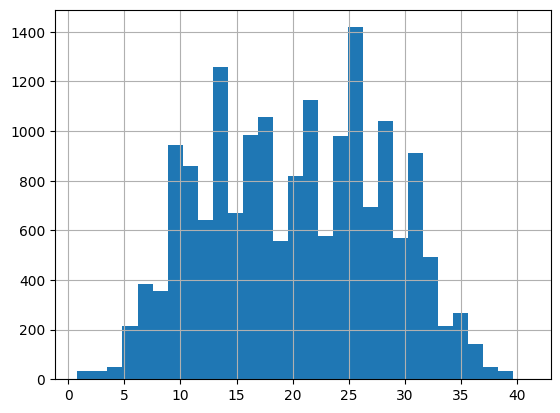

In [ ]:
hour_df['actual_temp'] = hour_df['temp']*41
hour_df['actual_temp'].hist(bins=30)

In [ ]:
hour_df['actual_temp'].describe()

,actual_temp
count,17379.000000
mean,20.376474
std,7.894801
min,0.820000
25%,13.940000
50%,20.500000
75%,27.060000
max,41.000000


**Insight:**
- Dengan mengalikan value dari `temp` dengan 41 didapatkan temperatur sesungguhnya (dalam celcius). Angka 41 saya dapatkan dari penjelasan file `ReadME` yang ada.
- Dalam dataset ini, tercatat temperatur terendahnya adalah 2.42°C dan tertingginya di 35.32°C.

In [ ]:
hour_df['actual_temp'] = hour_df.actual_temp.apply(lambda x: 'cold' if x < 15 else 'mild' if 15 <= x < 30 else 'hot')
hour_df['actual_temp'].value_counts()

,count
actual_temp,
mild,9823
cold,5441
hot,2115


**Insight:**
- Dikarenakan range yang terlalu besar, saya mengelompokkan temperatur menjadi hot, mild, dan cold.
- Pada temperatur diatas 25°C, penyewaan sepeda sangatlah meningkat dibandingkan dengan temperatur dibawahnya

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah Suhu dan Kondisi Cuaca Berpengaruh Terhadap Penyewaan Sepeda Pada Hari Kerja?


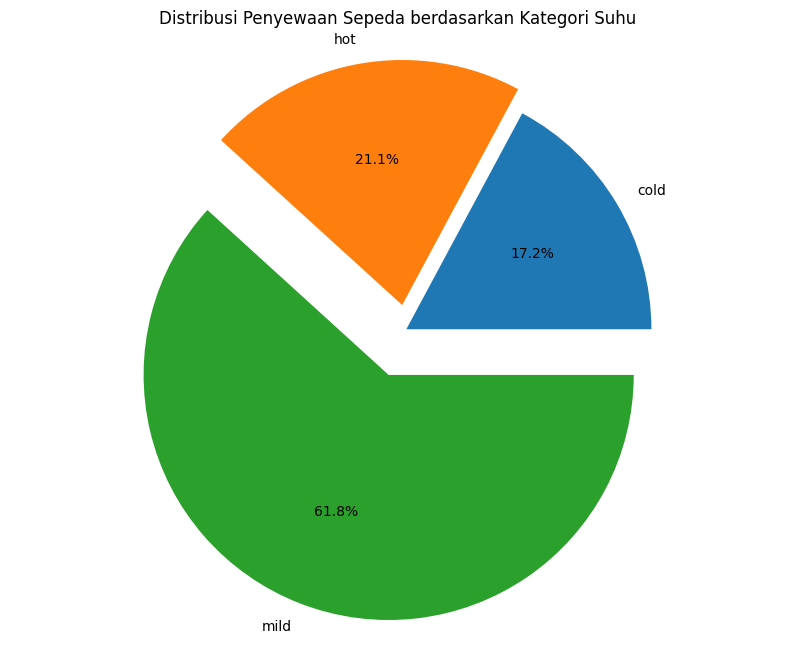

In [ ]:
grouped_temp = hour_df.groupby('actual_temp')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 8))
plt.pie(grouped_temp['cnt'], labels=grouped_temp['actual_temp'], autopct='%1.1f%%', explode=(0, 0.1, 0.2))
plt.title('Distribusi Penyewaan Sepeda berdasarkan Kategori Suhu')
plt.axis('equal')
plt.show()


Disini saya menggunakan <i>pie chart</i> untuk memberi gambaran tentang persentase distribusi penyewaan sepeda berdasarkan suhu. Saya memilih <i>pie chart</i> karena merupakan grafik paling efektif untuk menunjukkan suatu persentase

**Insight:**
- Dari pie chart berikut, terlihat bahwa sebanyak 61.38% orang menyewa sepeda saat suhu sedang (15-30°C)
- Hanya 21.1% orang menyewa sepeda pada saat suhu sedang panas dan 17.2% saat suhu sedang dingin


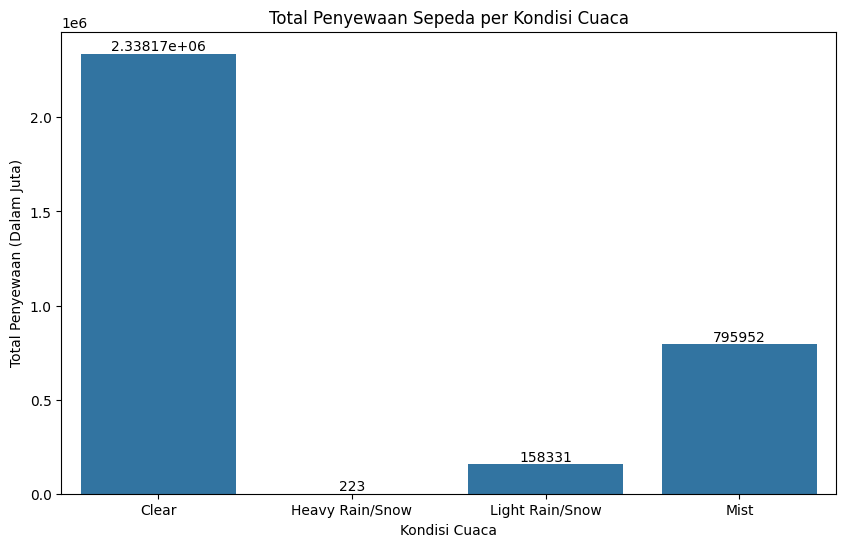

In [ ]:
grouped_weather = hour_df.groupby('weathersit')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
bars = sns.barplot(data=grouped_weather, x='weathersit', y='cnt')
bars.bar_label(bars.containers[0])

plt.title('Total Penyewaan Sepeda per Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan (Dalam Juta)')

plt.show()

Saya menggunakan <i>Bar plot</i> untuk menunjukkan beberapa analisis. Seperti di atas adalah analisis jumlah penyewaan sepeda berdasarkan cuaca yang sudah saya ubah dari data numerik menjadi kategorikal sebelumnya.

**Insight:**
- Grafik ini memperlihatkan perbandingan jumlah penyewa berdasarkan kondisi cuaca
- Mayoritas orang menyewa sepeda pada saat cuaca sedang cerah sebanyak lebih dari 2.3 juta penyewa, sedangkan hanya 223 penyewa yang menyewa sepeda pada saat cuaca sedang hujan deras


Text(0, 0.5, 'Jumlah Penyewaan (Dalam Juta)')

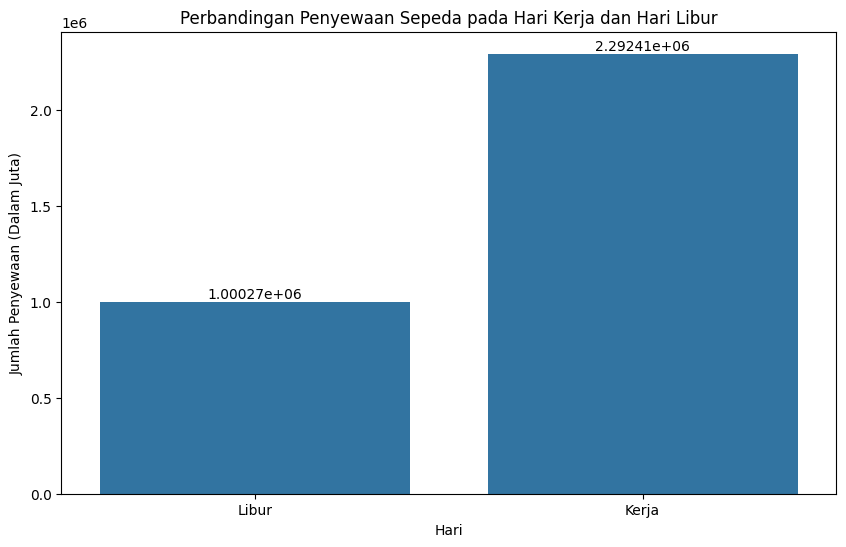

In [ ]:
grouped_workday = hour_df.groupby('workingday')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
bars = sns.barplot(data=grouped_workday, x='workingday', y='cnt')
bars.bar_label(bars.containers[0])

plt.title('Perbandingan Penyewaan Sepeda pada Hari Kerja dan Hari Libur')
plt.xlabel('Hari')
plt.xticks(ticks=[0, 1], labels=['Libur', 'Kerja'])
plt.ylabel('Jumlah Penyewaan (Dalam Juta)')

**Insight:**
- Grafik ini memperlihatkan bahwa mayoritas orang menyewa sepeda pada saat hari kerja
- Perbandingan juga cukup signifikan, dengan 2.29 Juta Penyewa pada saat hari kerja dan hanya 1 Juta Penyewa pada saat hari libur


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

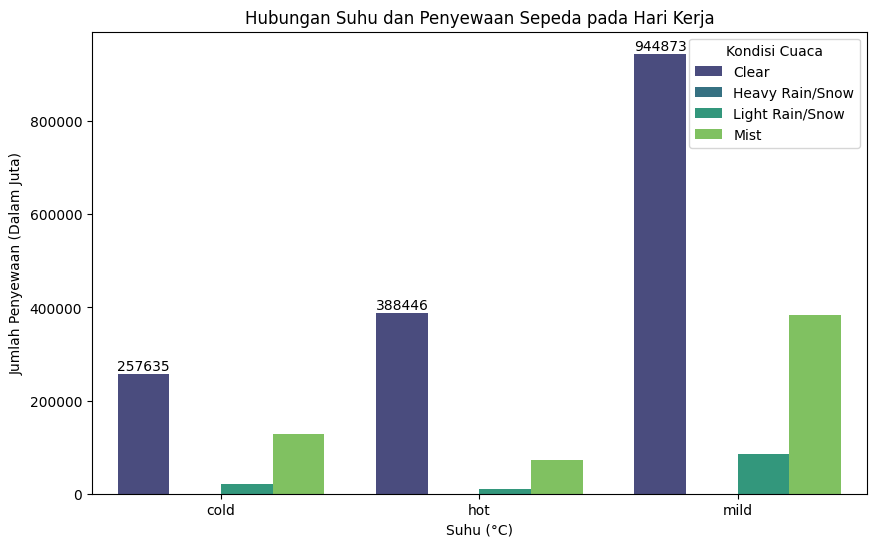

In [ ]:
workdays = hour_df[hour_df['workingday'] == 1]

grouped = workdays.groupby(['actual_temp', 'weathersit'])['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
bar = sns.barplot(data=grouped, x='actual_temp', y='cnt', hue='weathersit', palette='viridis')

bar.bar_label(bar.containers[0])

plt.title('Hubungan Suhu dan Penyewaan Sepeda pada Hari Kerja')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Penyewaan (Dalam Juta)')
plt.legend(title='Kondisi Cuaca')


**Insight:**
- Bar Plot diatas memperlihatkan dengan jelas perbandingan jumlah penyewa pada saat temperatur dan cuaca tertentu
- Grafik ini memperlihatkan mayoritas orang menyewa sepeda pada saat temperatur sedang dan cuaca sedang cerah
- Jumlah orang yang menyewa pada saat temperatur sedang dengan cuaca berkabut kurang lebih sama dengan orang yang menyewa pada saat temperatur panas dengan cuaca cerah
- Masih lebih banyak penyewa pada saat temperatur sedang dengan berkabut, dibandingkan pada saat cuaca cerah namun saat temperatur dingin


### Pertanyaan 2: Bagaimana Tren Penyewaan oleh Pengguna Kasual dan Pengguna Terdaftar?

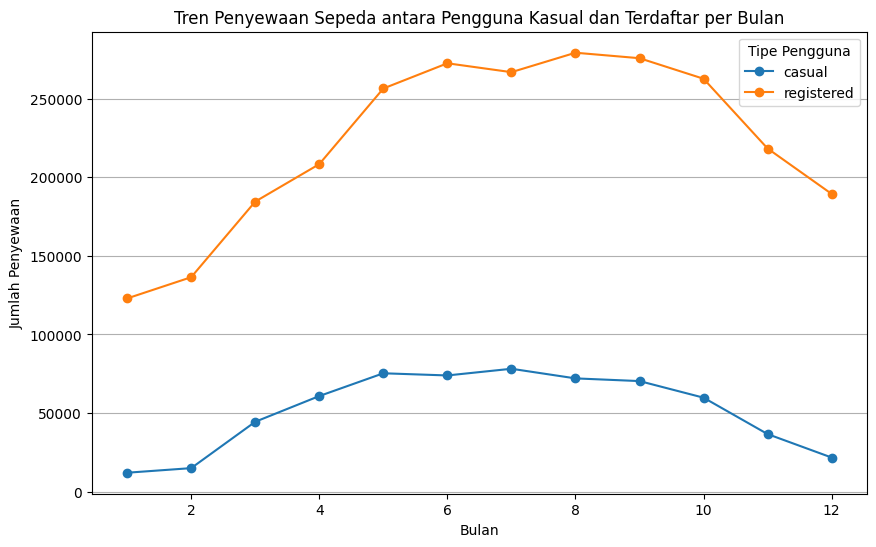

In [ ]:
monthly_rents = hour_df.groupby(by='mnth')[['casual', 'registered']].sum()
monthly_rents.plot(kind='line', figsize=(10, 6), marker='o')

plt.title('Tren Penyewaan Sepeda antara Pengguna Kasual dan Terdaftar per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=0)
plt.legend(title='Tipe Pengguna')
plt.grid(axis='y')
plt.show()

Dalam memvisualisasikan tren penyewaan sepeda antara pengguna kasual dan pengguna terdaftar di atas, saya menggunakan <i>line chart</i>. Penggunaan <i>line chart</i> disini dikarenakan grafik ini sangat efektif dalam menunjukkan perubahan data seiring waktu.

**Insight:**
- Jumlah penyewa dari penyewa kasual mencapai titik tertingginya pada bulan Juli
- Jumlah penyewa dari penyewa terdaftar mencapai titik tertingginya pada bulan agustus
- Jumlah penyewa terdaftar pada titik terendah masih lebih tinggi dibandingkan dengan jumlah penyewa kasual pada titik tertinggi

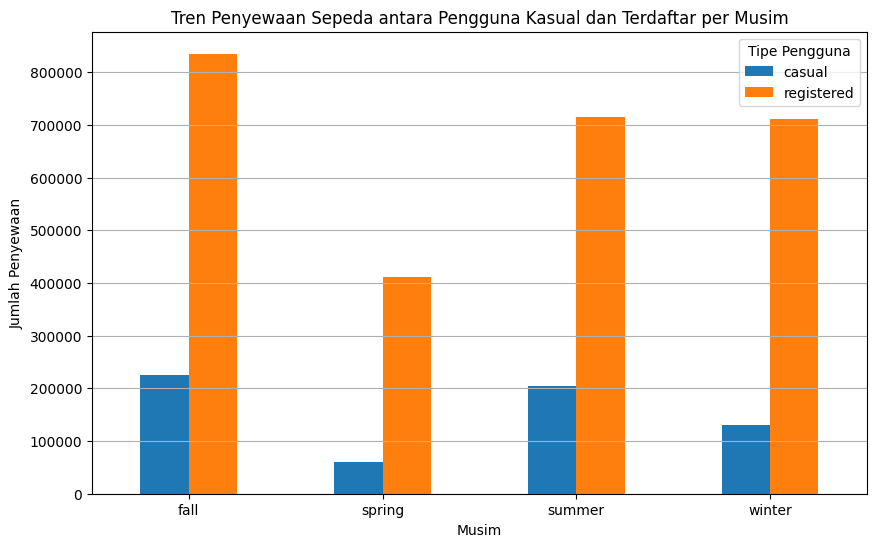

In [ ]:
seasonal_rents = hour_df.groupby('season')[['casual', 'registered']].sum()
seasonal_rents.plot(kind='bar', figsize=(10, 6))

plt.title('Tren Penyewaan Sepeda antara Pengguna Kasual dan Terdaftar per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=0)
plt.legend(title='Tipe Pengguna')
plt.grid(axis='y')
plt.show()

**Insight:**
- Pada musim gugur, jumlah penyewa baik dari penyewa kasual maupun terdaftar mencapai titik tertingginya
- Pada musim semi, jumlah penyewa baik dari penyewa kasual maupun terdaftar berada pada titik terendahnya

## Conclusion

- Conclution pertanyaan 1 : <br> Mayoritas orang menyewa sepeda pada hari kerja, kemungkinan ini terjadi karena penyewa berasal dari kalangan pekerja yang membutuhkan kendaraan untuk transportasi pada hari kerja. Suhu dan cuaca menjadi faktor penting dalam pertimbangan calon penyewa. Terlihat pada hasil visualisasi, sebanyak 61.8% penyewa memilih menyewa sepeda pada saat suhu sedang (15-30°C). Data juga menunjukkan bahwa pada saat cuaca sedang cerah, terjadi peningkatan sewa sepeda jika dibandingkan dengan pada saat cuaca sedang berkabut ataupun hujan. Hal ini membuktikan bahwa cuaca dan suhu sangat berpengaruh dalam jumlah penyewaan sepeda, khususnya pada saat hari kerja. <br>

- Conclution pertanyaan 2 : <br>
Jumlah penyewa dari penyewa kasual dan terdaftar memiliki tren yang serupa. Pada bulan Januari keduanya berada di titik terendah, lalu mengalami peningkatan hingga pertengahan tahun. Penyewa kasual mencapai titik tertingginya pada bulan Juli, sedangkan penyewa terdaftar pada bulan Agustus. <br><br>Walaupun jumlah penyewa dari penyewa kasual lebih sedikit dibandingkan penyewa terdaftar, jika dilihat dari persentase peningkatan jumlah penyewa, penyewa kasual mengalami peningkatan yang cukup signifikan. Pada bulan Januari, jumlah penyewa dari penyewa kasual adalah 12042 dan di bulan Juli jumlahnya mencapai 78157. Hal ini berarti terjadi peningkatan sebesar 549%. Jika dibandingkan dengan penyewa terdaftar yang memiliki 122891 penyewa di bulan Januari dan meningkat menjadi 266791 penyewa di bulan Juli, berarti hanya terjadi peningkatan sebesar 117%.